In [1]:
import re
import tensorflow as tf
import pandas as pd
import numpy as np
import rubrix as rb
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [79]:
data_labelled = pd.read_csv("D:\Downloads\Twitter_Emotion_Dataset_with_label.csv")

In [3]:
snorkel_data = pd.read_csv("D:\Downloads\Snorkel_dataset_v7.csv")

In [80]:
merged_data= pd.read_csv("D:\Downloads\Twitter_Emotion_Dataset_with_label_Merged.csv")

In [81]:
snorkel_data_20 = pd.read_csv("D:\Downloads\Snorkel_dataset_with_20_test.csv")

In [82]:
snorkel_data_20['tweet'].iloc[2990]

'Apa menariknya agama Buku rujukan tapi sok tau Tak ada hal baru Tak ada mantra penemuan terbaru yang lebih mustajab untuk mengatasi masalah Rumusan mantranya tetap kuno Mantra yang namanya sapu jagat apa bermanfaat saat Covid Bila ada yang marah pasti penganutnya'

In [7]:
snorkel_data_20['label'].value_counts()

0    1183
4     675
1     543
3     479
2     420
Name: label, dtype: int64

In [83]:
gb_num_words=1000
gb_output_dim=50
gb_epochs=30
gb_n_hidden_layers=25
gb_trainable=False
gd_dense = 5
gb_test_size=0.2

In [84]:
con=open("D:\Downloads\glove_50dim_wiki.id.case.text.txt",encoding='utf-8')

In [85]:
index={}
for words in con:
    values=words.split()
    word=values[0]
    vect=np.asarray(values[1:],dtype='float32')
    index[word]=vect

In [126]:
x=snorkel_data_20['tweet']
y=snorkel_data_20['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)


In [108]:
data_labelled['label'] = data_labelled['label'].replace(['happy', 'anger', 'sadness', 'fear', 'love'],[0, 1, 2, 3, 4]  )
data_labelled

,label,tweet
0,1,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,1,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,0,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,1,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,0,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,4,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,3,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,1,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,0,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [13]:
merged_data['label'] = merged_data['label'].replace(['happy', 'anger', 'sadness', 'fear', 'love'],[0, 1, 2, 3, 4]  )
merged_data

,label,tweet
0,1,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,1,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,0,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,1,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,0,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
7696,0,Happy birthday boss
7697,0,Yeayy Alhamdulillah lazada pecah telor today s...
7698,3,kaget lebih ke takut si
7699,2,Astaga lupa


In [36]:
merged_data.shape

(7701, 2)

In [151]:
x=data_labelled['tweet']
y=data_labelled['label']
X_train_normal, X_test_normal, y_train_normal, y_test_normal=train_test_split(x,y,test_size=gb_test_size,random_state=100)


In [34]:
merged_data_80 = merged_data.sample(frac=0.885)


In [38]:
X_train_normal

1639    Terima kasih [USERNAME] Sudah memberi pelita p...
547     Kmren cerita2 sama tmen FIK [USERNAME] yg ceri...
2032    Hidup di jaman Naow ini kalau hanya pengen di ...
1252    ih wowo saya pemaf kok tapi maaf saya pendenda...
4128    asli parno bgt kebangun ada bunyi2 deket telin...
                              ...                        
4149    Disini tempat ternyaman,  Melihat seberapa Ind...
1890    Abis take away beberapa menu Tulung Agung Pasa...
350     [USERNAME] [USERNAME] .... Ini aja membuktikan...
79      [USERNAME] [USERNAME] [USERNAME] [USERNAME] Ma...
3927    yang, aku aja inget :") malah kemaren siapa ya...
Name: tweet, Length: 3520, dtype: object

In [93]:
combined_X_train = pd.concat([snorkel_data_20['tweet'], X_train_normal], axis=0, ignore_index=True)


In [94]:
combined_y_train = pd.concat([snorkel_data_20['label'], y_train_normal], axis=0, ignore_index=True)


In [48]:
combined_X_train.shape

(6820,)

In [49]:

combined_y_train.shape

(6820,)

In [22]:
X_test_normal.shape

(881,)

In [23]:
y_test_normal.shape

(881,)

In [142]:
enc=LabelEncoder()
tokens=Tokenizer(num_words=gb_num_words)

In [148]:
# combined data


tokens.fit_on_texts(combined_X_train)
combined_X_train = tokens.texts_to_sequences(combined_X_train)
X_test_normal = tokens.texts_to_sequences(X_test_normal)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [150]:
# weakly supervised data

tokens.fit_on_texts(x_train)
x_train= tokens.texts_to_sequences(x_train)
X_test_normal = tokens.texts_to_sequences(X_test_normal)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [152]:
# manually supervised data

tokens.fit_on_texts(X_train_normal)
X_train_normal = tokens.texts_to_sequences(X_train_normal)
X_test_normal = tokens.texts_to_sequences(X_test_normal)

In [52]:
# combined data

combined_y_train= enc.fit_transform(combined_y_train)
y_test_normal= enc.transform(y_test_normal)

In [131]:
# weakly supervised data

y_train = enc.fit_transform(y_train)
y_test_normal= enc.transform(y_test_normal)

In [153]:
# manually supervised data

y_train_normal = enc.fit_transform(y_train_normal)
y_test_normal= enc.transform(y_test_normal)

In [154]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [98]:
combined_X_train

[[120, 120, 90, 635, 11, 49, 65, 7, 346],
 [40, 151],
 [789, 291, 64, 337, 291, 46, 79],
 [575, 180, 790, 986, 202, 221, 17, 7, 145, 65, 888],
 [40, 151],
 [767, 134, 217, 221, 492, 29, 300, 950, 50, 500, 273, 330, 259, 217, 10],
 [400, 40, 368, 791, 589, 214, 281, 214, 1, 22, 338, 395, 2, 395, 11, 1, 12],
 [987, 23, 42, 473],
 [225,
  740,
  851,
  130,
  889,
  130,
  307,
  71,
  558,
  104,
  2,
  768,
  287,
  14,
  678,
  2,
  50,
  17],
 [106, 51, 741, 72, 165, 7, 120, 107, 90, 10],
 [440, 220, 292, 202, 3, 440, 161, 177],
 [308, 94, 104, 6, 83, 716],
 [890, 384, 98, 7, 19, 27, 310, 20, 347],
 [7, 183, 65, 239, 8, 268, 456, 22, 106, 13, 29, 769, 852],
 [623, 41, 9, 501, 242, 717, 41, 376, 97],
 [428, 173, 234, 2, 173, 35, 6, 1, 4, 165, 7, 22, 52, 28, 34, 11],
 [20, 34, 129, 679],
 [405, 48, 178, 259, 101, 16],
 [40, 576, 624, 91, 853],
 [369,
  123,
  99,
  196,
  125,
  63,
  196,
  295,
  550,
  658,
  550,
  279,
  951,
  29,
  590,
  659,
  90,
  659],
 [46, 815],
 [464, 25,

In [99]:
combined_y_train


0       2
1       0
2       4
3       4
4       0
       ..
6815    0
6816    0
6817    1
6818    1
6819    4
Name: label, Length: 6820, dtype: int64

In [100]:
#combined data

from tensorflow.keras.utils import to_categorical


combined_y_train=to_categorical(combined_y_train)
y_test_normal=to_categorical(y_test_normal)
combined_X_train=pad_sequences(combined_X_train,maxlen=16)
X_test_normal=pad_sequences(X_test_normal,maxlen=16)

In [133]:
#weakly supervised data

from tensorflow.keras.utils import to_categorical


y_train=to_categorical(y_train)
y_test_normal=to_categorical(y_test_normal)
x_train=pad_sequences(x_train,maxlen=16)
X_test_normal=pad_sequences(X_test_normal,maxlen=16)

In [155]:
#manually labeled data

from tensorflow.keras.utils import to_categorical


y_train_normal=to_categorical(y_train_normal)
y_test_normal=to_categorical(y_test_normal)
X_train_normal=pad_sequences(X_train_normal,maxlen=16)
X_test_normal=pad_sequences(X_test_normal,maxlen=16)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder

model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,
                    weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [102]:
#combined data

history = model.fit(combined_X_train, combined_y_train, epochs=gb_epochs, validation_data=(X_test_normal, y_test_normal), batch_size=32)

# Obtain predicted labels
predicted_labels = model.predict(X_test_normal)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert ground truth labels to integer format
ground_truth_labels = np.argmax(y_test_normal, axis=1)

# Generate classification report
target_names = ['happy', 'anger', 'sadness', 'fear', 'love']
classification_rep = classification_report(ground_truth_labels, predicted_labels, target_names=target_names)

Epoch 1/30
214/214 [==============================] - 8s 18ms/step - loss: 1.4619 - accuracy: 0.3786 - val_loss: 1.4159 - val_accuracy: 0.3848
Epoch 2/30
214/214 [==============================] - 3s 14ms/step - loss: 1.2476 - accuracy: 0.4934 - val_loss: 1.3779 - val_accuracy: 0.4154
Epoch 3/30
214/214 [==============================] - 3s 13ms/step - loss: 1.1233 - accuracy: 0.5548 - val_loss: 1.3240 - val_accuracy: 0.4631
Epoch 4/30
214/214 [==============================] - 3s 14ms/step - loss: 1.0389 - accuracy: 0.6022 - val_loss: 1.3169 - val_accuracy: 0.4495
Epoch 5/30
214/214 [==============================] - 3s 14ms/step - loss: 0.9748 - accuracy: 0.6296 - val_loss: 1.2928 - val_accuracy: 0.4949
Epoch 6/30
214/214 [==============================] - 3s 14ms/step - loss: 0.9217 - accuracy: 0.6541 - val_loss: 1.2918 - val_accuracy: 0.4881
Epoch 7/30
214/214 [==============================] - 3s 14ms/step - loss: 0.8744 - accuracy: 0.6777 - val_loss: 1.2903 - val_accuracy: 0.4858

In [156]:
#weakly supervised data

history = model.fit(x_train, y_train, epochs=gb_epochs, validation_data=(X_test_normal, y_test_normal), batch_size=32)

# Obtain predicted labels
predicted_labels = model.predict(X_test_normal)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert ground truth labels to integer format
ground_truth_labels = np.argmax(y_test_normal, axis=1)

# Generate classification report
target_names = ['happy', 'anger', 'sadness', 'fear', 'love']
classification_rep = classification_report(ground_truth_labels, predicted_labels, target_names=target_names)

Epoch 1/30
83/83 [==============================] - 1s 16ms/step - loss: 0.0884 - accuracy: 0.9784 - val_loss: 5.4815 - val_accuracy: 0.2066
Epoch 2/30
83/83 [==============================] - 1s 16ms/step - loss: 0.0888 - accuracy: 0.9795 - val_loss: 5.4366 - val_accuracy: 0.2270
Epoch 3/30
83/83 [==============================] - 1s 15ms/step - loss: 0.0738 - accuracy: 0.9837 - val_loss: 5.4994 - val_accuracy: 0.2213
Epoch 4/30
83/83 [==============================] - 1s 13ms/step - loss: 0.0706 - accuracy: 0.9841 - val_loss: 5.5648 - val_accuracy: 0.2179
Epoch 5/30
83/83 [==============================] - 1s 14ms/step - loss: 0.0639 - accuracy: 0.9852 - val_loss: 5.7665 - val_accuracy: 0.2236
Epoch 6/30
83/83 [==============================] - 1s 15ms/step - loss: 0.0598 - accuracy: 0.9894 - val_loss: 5.7211 - val_accuracy: 0.2225
Epoch 7/30
83/83 [==============================] - 1s 16ms/step - loss: 0.0555 - accuracy: 0.9883 - val_loss: 5.9479 - val_accuracy: 0.2202
Epoch 8/30
83

KeyboardInterrupt: 

In [157]:
#manually labeled data

history = model.fit(X_train_normal, y_train_normal, epochs=gb_epochs, validation_data=(X_test_normal, y_test_normal), batch_size=32)



Epoch 1/30
110/110 [==============================] - 2s 16ms/step - loss: 2.2515 - accuracy: 0.2199 - val_loss: 1.6529 - val_accuracy: 0.2304
Epoch 2/30
110/110 [==============================] - 2s 15ms/step - loss: 1.5987 - accuracy: 0.2622 - val_loss: 1.5932 - val_accuracy: 0.2633
Epoch 3/30
110/110 [==============================] - 2s 15ms/step - loss: 1.5519 - accuracy: 0.2872 - val_loss: 1.5686 - val_accuracy: 0.2804
Epoch 4/30
110/110 [==============================] - 2s 15ms/step - loss: 1.5183 - accuracy: 0.3165 - val_loss: 1.5425 - val_accuracy: 0.3008
Epoch 5/30
110/110 [==============================] - 2s 15ms/step - loss: 1.4844 - accuracy: 0.3307 - val_loss: 1.5273 - val_accuracy: 0.3269
Epoch 6/30
110/110 [==============================] - 2s 15ms/step - loss: 1.4539 - accuracy: 0.3551 - val_loss: 1.5090 - val_accuracy: 0.3462
Epoch 7/30
110/110 [==============================] - 2s 15ms/step - loss: 1.4235 - accuracy: 0.3753 - val_loss: 1.4831 - val_accuracy: 0.3405

In [137]:
from sklearn import metrics

# get predictions for the test set
predicted = model.predict(X_test_normal)
label2int = {'happy': 0, 'anger': 1, 'sadness': 2, 'fear': 3, 'love': 4}
y_test_int = np.argmax(y_test_normal, axis=1)



print(metrics.classification_report(y_test_int, predicted_labels, target_names=label2int.keys()))

 1/28 [>.............................] - ETA: 1s

28/28 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       happy       0.32      0.51      0.39       199
       anger       0.45      0.28      0.35       211
     sadness       0.30      0.15      0.20       196
        fear       0.47      0.44      0.46       151
        love       0.38      0.56      0.45       124

    accuracy                           0.37       881
   macro avg       0.38      0.39      0.37       881
weighted avg       0.38      0.37      0.36       881



In [158]:
results_lstm_1=pd.DataFrame(model.history.history)
results_lstm_1

""


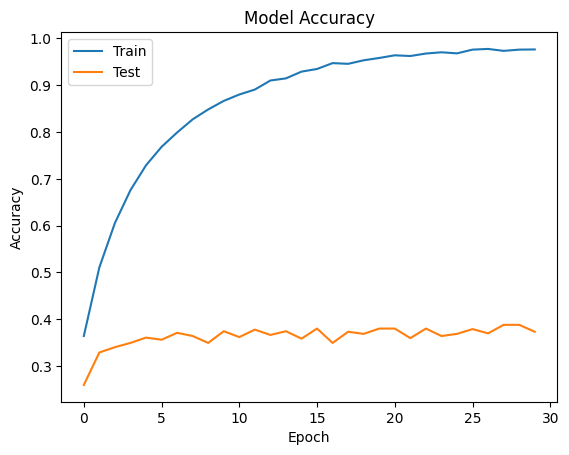

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

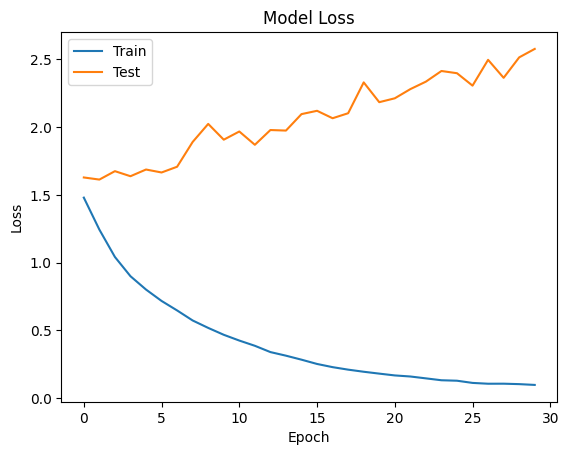

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()